<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Pandas Transformation Lab

_Authors: Riley Dallas (ATX), Dave Yerrington (SF), Mark Popovich (SF)_

## Objectives

In this lab, you'll get some practice concatenating Pandas dataframes and plotting.

### Imports

Scikit Learn comes pre-loaded with a number of datasets. Today we'll be working with the canonical iris data.

In [344]:
from sklearn.datasets import load_iris
import pandas as pd

## Munging Data

### Load Data
Scikit Learn datasets are actually functions that return an object containing the data we need. 

In the cell below, call the `load_iris()` function and set the result to a variable called `data`.

In [345]:
data = load_iris()

### Examining Target Data

In machine learning, the column we're trying to predict is usually called the **target** (or **label**). 

**To see the targets for our dataset, call `data['target']` in the cell below.**

 Also, you can use `data.keys()` to see a list of elements available inside the `data` object.
```python
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
```

In [346]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [347]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In the case of the iris dataset, the target is the particular species of iris flower. Because machine learning requires our features and target to be numbers, the species are encoded as 0, 1, 2. These indices correspond to the labeled species on `data.target_names`

**Call `data['target_names']` to see the actual names of the three species**

In [348]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Get the length of `data['target']` to see how many flowers are in this dataset.**

In [349]:
len(data['target_names'])

3

### Create `species` DataFrame

**Use `data['target']` to create your first pandas DataFrame, which is just a single column (`"species"`).**

In [350]:
species = pd.DataFrame(data['target'], columns=['species'])

### Examining Feature Data

The features for this dataset are on `data['data']`. There are 150 rows, one for each flower and 4 columns, one for each of the following features:
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)

**Output `data['data']` in the cell below to see the features for this dataset**

In [351]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### Create `features` DataFrame

Create a `features` DataFrame in pandas, using `data['data']` and `data['feature_names']` 

You can use `pd.DataFrame()` to create a DataFrame, passing the `columns` parameter using `data['feature_names']`

In [352]:
features = pd.DataFrame(data['data'],columns=data['feature_names'])

### `pd.concat`

**Use `pd.concat` to combine the two dataframes.**

- The concat method essentially squishes two dataframes together, along either Axis 0 or Axis 1.
- Axis 0 here refers to the rows. If we concat along axis 0, we would be stacking one DataFrame on top of the other. That is not what we want to accomplish in this case.
- Instead, we want to put the two dataframes side-by-side. In order to do that, we concat the columns by using Axis 1.
- Review / research the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) on the useage of this function.  

In [353]:
pd.concat([features,species],axis=1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### `df.join`

Compare concat with `DataFrame.join` by joining the two original DataFrames instead.

In this case, we do not have to specify an axis. Join here is explicitly for joining two or more dataframes on columns. You can even pass a list of DataFrames to join if you have more than one (they must all have the same column to join on). Refer to the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html)

In [354]:
features.join(species)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### `df.merge`

Compare concat with `DataFrame.merge` by merging the two original DataFrames instead.

Like join, merge does not function across rows. Additionally, you will note that without a common column to merge on, you must be explicit about telling pandas to merge on the right and left indices. You can do this with `left_index=True` and `right_index=True`. Because we are not merging on a column, we do not pass `on` or `how` parameters, but both of those parameters will become very important to you as you do more sophisticated merging. Refer to the documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [355]:
features.merge(species, left_index=True, right_index=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Make Features List

Create a list of all the numeric column names by dropping the species column, then calling the `columns` attribute followed by the `values` attribute. Save it to a variable named `num_cols`. 

In [356]:
df = features.merge(species, left_index=True, right_index=True)

In [357]:
num_cols = df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].columns.values

You may want to reference the order of your numeric columns (so just print them out).

In [358]:
num_cols

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype=object)

In [359]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### Insert an Interaction Column

Multiply the four numeric columns together and save them as a new column `interaction`.

Inserting a new column is as easy as:
```
df['new_column_name_as_string'] = values
```
The `values` here can be many different things:
- a `pd.Series` that shares an index with our DataFrame will align perfectly and no NaNs will be present.
- a list or array of the same length as our DataFrame will also align perfectly.
- a single value will set that value for all rows.

(It's also important to note that when we set a value at a specific location in a new column, all unspecified locations will be filled with NaNs.)

**We can use `apply` and `lambda` to do this. Here's an example:**

To get the sepal area (len * width), we can:

**Let's break down this code:**
```
df.apply(lambda x: x[num_cols[0]] * x[num_cols[1]], axis=1)
```

First, let's remember that:
- `num_cols[0] == 'sepal length (cm)'`
- `num_cols[1] == 'sepal width (cm)'`

The apply function will allow us to pass a function over an axis of our DataFrame:
- here, we specify `axis=1`, which means that we are grabbing all of our rows and applying our function to their columns.

`lambda` functions are disposable, and often just use the variable `x` as a placeholder for whatever they're operating on:
- because we're operating on our rows, `x` becomes a row each time our function is applied.
- we can specify which columns we want to operate on, noting that those column values will be multiplied by the same column in that row.

Thus, we can basically read this code as:
```
For each row in df, multiply sepal length (cm) by sepal width (cm)
```

**Now, do this for ALL numeric columns and assign this the new column `interaction`**

In [360]:
interaction = df[num_cols[0]] * df[num_cols[1]] * df[num_cols[2]] * df[num_cols[3]]

In [361]:
df['interaction'] = df.apply(lambda x: x[num_cols[0]] * x[num_cols[1]]* x[num_cols[2]]* x[num_cols[3]], axis=1)

In [362]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,interaction
0,5.1,3.5,1.4,0.2,0,4.9980
1,4.9,3.0,1.4,0.2,0,4.1160
2,4.7,3.2,1.3,0.2,0,3.9104


### Return All Rows for a Subset of Columns

There are lots of ways to select data of interest in a DataFrame.

Use the `.loc` method to display all of the rows (`:`) and only the numeric columns

Note that we can do this same thing just by passing a list of column names:

In [363]:
df.loc[:,num_cols]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### Insert `target_names`

Let's insert a string (object in pandas) encoded column from the species column for human-readable labels. 

Let's look at our `target_names` again.

In [364]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

And our `species` column.

*Using `.value_counts()` will get us the count for each of our classes.*

In [365]:
df.species.value_counts()

2    50
1    50
0    50
Name: species, dtype: int64

While not extremely well documented, the order of `data.target_names` corresponds with our numeric targets.


We'll start by writing a dictionary `species_name` by using a dictionary comprehension on the `data['target_names']` array from the original iris dataset. We'll use the `enumerate` function as an easy way to accomplish this.

In [366]:
species_name = { key: value for key, value in enumerate(data['target_names'])}

Let's look at those key value pairs:

In [367]:
species_name

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

Then use the `map` pandas method on the `species` column with the `species_name` dict. Save the result to `df['labels']`.

**Why this works:**

When we `map` a dict to a Series, we pass each value of the Series as a key to our dict. Here, our `species` are the integers `[0, 1, 2]` which are the keys in our dict, so we access the corresponding species name currently stored as our values.

**Note**: `map` is much like `apply`, but only applies to a single column (a Pandas series).

In [368]:
df['labels'] = df['species'].map(species_name)

In [369]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,interaction,labels
0,5.1,3.5,1.4,0.2,0,4.9980,setosa
1,4.9,3.0,1.4,0.2,0,4.1160,setosa
2,4.7,3.2,1.3,0.2,0,3.9104,setosa
3,4.6,3.1,1.5,0.2,0,4.2780,setosa
4,5.0,3.6,1.4,0.2,0,5.0400,setosa


## Plotting

We'll start by importing our plotting packages using their preferred aliases.

In [370]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Pairplot

Create a pairplot from your dataframe. Use the seaborn package to do so (`sns.pairplot`) and pass the argument `hue` with the column `'labels'`. This will use the labels column we created above to both color the scatterpoints and create a legend. Add a semicolon `;` at the end of your plotting code to prevent unsightly output above the chart. 

C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Owen\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


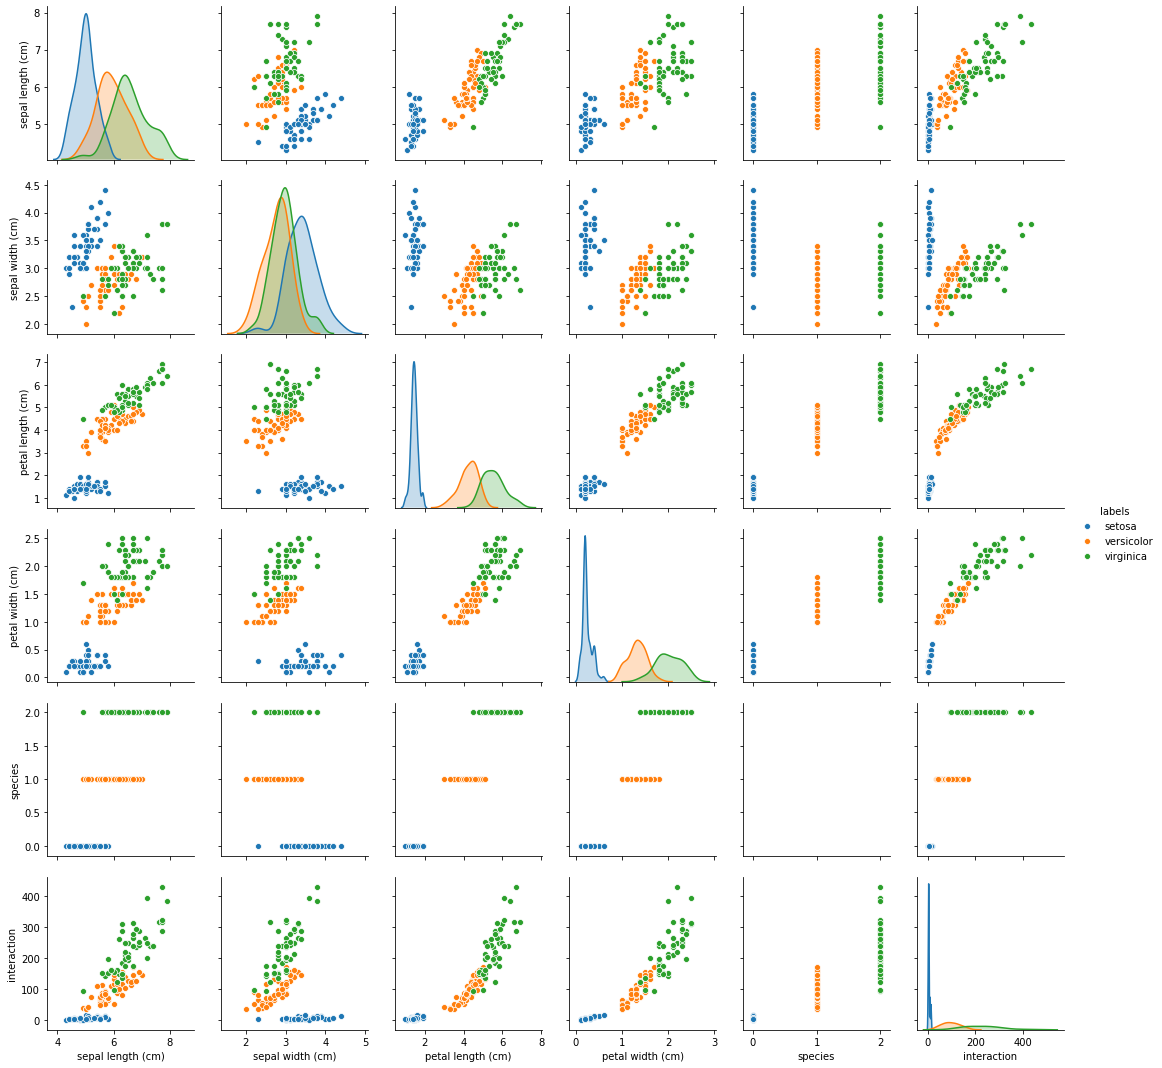

In [371]:
sns.pairplot(df,hue='labels');

### Histograms

Generate one histogram for each of the 4 original numeric columns. Use at least 3 different plotting methods to do so. (pandas built-in, matplotlib, seaborn). BONUS: Use plotly for one of the histograms. 

Hint: for seaborn you will want `sns.distplot`

In [372]:
#pull down column names for reference
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'interaction', 'labels'],
      dtype='object')

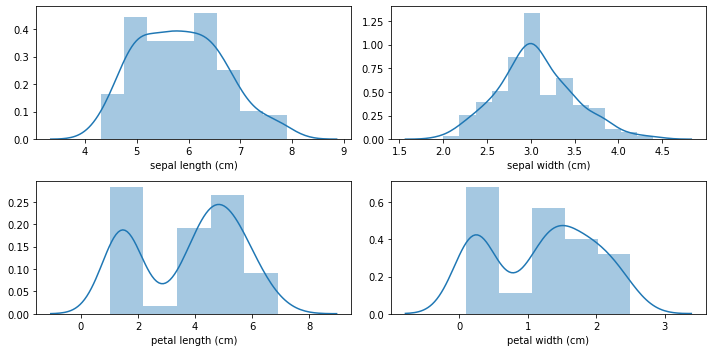

In [373]:
#start by building figure space
plt.figure(figsize=(10,5))

#generate histograms subplot by subplot for feature columns
plt.subplot(2,2,1)
sns.distplot(df['sepal length (cm)'])
plt.subplot(2,2,2)
sns.distplot(df['sepal width (cm)'])
plt.subplot(2,2,3)
sns.distplot(df['petal length (cm)'])
plt.subplot(2,2,4)
sns.distplot(df['petal width (cm)'])
plt.tight_layout()

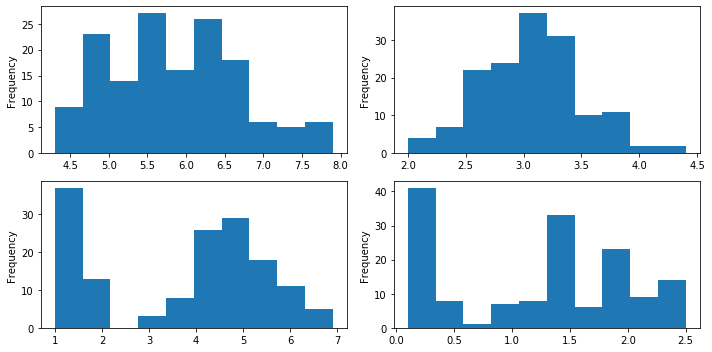

In [374]:
##start by building figure space
plt.figure(figsize=(10,5))

#generate histograms subplot by subplot for feature columns
plt.subplot(2,2,1)
df['sepal length (cm)'].plot(kind='hist')
plt.subplot(2,2,2)
df['sepal width (cm)'].plot(kind='hist')
plt.subplot(2,2,3)
df['petal length (cm)'].plot(kind='hist')
plt.subplot(2,2,4)
df['petal width (cm)'].plot(kind='hist')
plt.tight_layout()

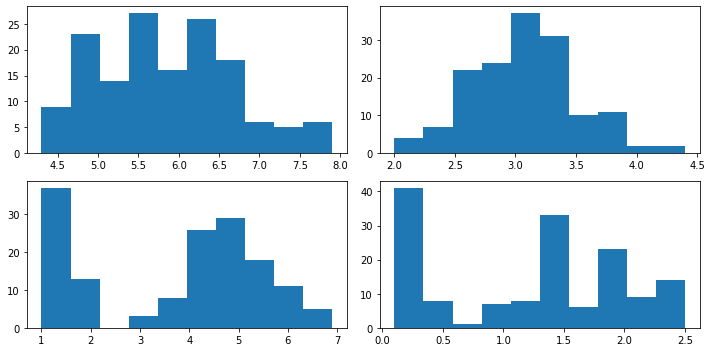

In [375]:
##start by building figure space
plt.figure(figsize=(10,5))

#generate histograms subplot by subplot for feature columns
plt.subplot(2,2,1)
plt.hist(df['sepal length (cm)'])
plt.subplot(2,2,2)
plt.hist(df['sepal width (cm)'])
plt.subplot(2,2,3)
plt.hist(df['petal length (cm)'])
plt.subplot(2,2,4)
plt.hist(df['petal width (cm)'])
plt.tight_layout()

#### BONUS: Plotly

If you want to get started with plotly, you will need to pip install the two packages above and then head to [plotly](https://plot.ly/feed/#/) and like the sign-up button. After you create your account, you will see a field marked API Key. Click the `Regenerate Key` button to display a new api key, then copy and paste that with your username into the field below. 

In [376]:
# Plotly histogram
#!pip install plotly --upgrade
#!pip install cufflinks --upgrade

In [377]:
# In order to get plotly to work, you will need to create a username and api_key
# the following code writes your credentials to a static file, 
# so you will only ever need to run it once. 
import plotly 
plotly.tools.set_credentials_file(username='', api_key='')

ModuleNotFoundError: No module named 'plotly'